# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import seaborn as sns
import json


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Had to use numerous api keys so I made it a solo variable
api_key = "b6aa28d44f22651390f8349e49d00260"

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [4]:
# Prints out the random cities
cities

['tuktoyaktuk',
 'leningradskiy',
 'albany',
 'qaanaaq',
 'latung',
 'mar del plata',
 'avarua',
 'la paz',
 'broome',
 'bambous virieux',
 'bethel',
 'lompoc',
 'necochea',
 'luderitz',
 'hobart',
 'flinders',
 'hasaki',
 'lolua',
 'sasovo',
 'esperance',
 'sur',
 'atuona',
 'vaini',
 'pudem',
 'bansang',
 'kamenskoye',
 'labuhan',
 'moen',
 'nizhneyansk',
 'pueblo',
 'barrow',
 'abaete',
 'cidreira',
 'talnakh',
 'east london',
 'mataura',
 'rikitea',
 'lalomanu',
 'puerto ayora',
 'ushuaia',
 'qandala',
 'hermanus',
 'punta arenas',
 'thompson',
 'arraial do cabo',
 'saint george',
 'airai',
 'severo-kurilsk',
 'busselton',
 'upernavik',
 'rosarito',
 'okhotsk',
 'alyangula',
 'sentyabrskiy',
 'tarakan',
 'barentsburg',
 'saint-paul',
 'samarai',
 'puerto narino',
 'ostrovnoy',
 'provideniya',
 'asind',
 'mahebourg',
 'okha',
 'nikolskoye',
 'saint-philippe',
 'taolanaro',
 'illoqqortoormiut',
 'dolores',
 'nuuk',
 'constitucion',
 'westport',
 'cherskiy',
 'rabo de peixe',
 'new no

In [ ]:
#Drop cities not found
cities_data_pd = cities_data_pd[cities_data_pd["Country"] != ""]
cities_data_pd.count()

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Starting URL for Weather Map API Call, created with a formatted string that includes my api key
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}&q="

# Creates a temporary dataframe that will eventually hold the values retrieved from the API call
cities_data_pd = pd.DataFrame({"City": cities})
cities_data_pd["Cloudiness"] = ""
cities_data_pd["Country"] = ""
cities_data_pd["Date"] = ""
cities_data_pd["Humidity"] = ""
cities_data_pd["Lat"] = ""
cities_data_pd["Lng"] = ""
cities_data_pd["Max Temp"] = ""
cities_data_pd["Wind Speed"] = ""

# Creates a for loop that will go throguh all the above citites 
for index, row in cities_data_pd.iterrows():
    city = row["City"]
    response = requests.get(url + city).json()

# creates a try loop that will go through the for loop
    try:
        print(f"Processing Record {index + 1} of {len(cities)} | {city}")
        print(url + city)
        
# uses loc function to locate the variables of interest in the api link and puts it into my dataframe         
        cities_data_pd.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_data_pd.loc[index, "Country"] = response["sys"]["country"]
        cities_data_pd.loc[index, "Date"] = response["dt"]
        cities_data_pd.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_data_pd.loc[index, "Lat"] = response["coord"]["lat"]
        cities_data_pd.loc[index, "Lng"] = response["coord"]["lon"]
        cities_data_pd.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_data_pd.loc[index, "Wind Speed"] = response["wind"]["speed"]

# Uses an exception incase the city is nto found and will skip the city
    except (KeyError, IndexError):
        print("City not found. Skipping...")

Processing Record 1 of 600 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=tuktoyaktuk
Processing Record 2 of 600 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=leningradskiy
Processing Record 3 of 600 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=albany
Processing Record 4 of 600 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=qaanaaq
Processing Record 5 of 600 | latung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=latung
Processing Record 6 of 600 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=mar del plata
Processing Record 7 of 600 | avarua
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 55 of 600 | tarakan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=tarakan
Processing Record 56 of 600 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=barentsburg
City not found. Skipping...
Processing Record 57 of 600 | saint-paul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=saint-paul
Processing Record 58 of 600 | samarai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=samarai
Processing Record 59 of 600 | puerto narino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=puerto narino
Processing Record 60 of 600 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=ostrovnoy
Processing Record 61 of 600 | provideniya
http:/

Processing Record 110 of 600 | pampa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=pampa
Processing Record 111 of 600 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=khatanga
Processing Record 112 of 600 | tahta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=tahta
Processing Record 113 of 600 | praia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=praia
Processing Record 114 of 600 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=hilo
Processing Record 115 of 600 | champerico
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=champerico
Processing Record 116 of 600 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28

Processing Record 164 of 600 | krasnoselkup
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=krasnoselkup
Processing Record 165 of 600 | egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=egvekinot
Processing Record 166 of 600 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=mys shmidta
City not found. Skipping...
Processing Record 167 of 600 | hofn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=hofn
Processing Record 168 of 600 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=port alfred
Processing Record 169 of 600 | sisimiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=sisimiut
Processing Record 170 of 600 | sangar
http://a

Processing Record 218 of 600 | hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=hamilton
Processing Record 219 of 600 | bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=bonavista
Processing Record 220 of 600 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=georgetown
Processing Record 221 of 600 | tocopilla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=tocopilla
Processing Record 222 of 600 | quirinopolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=quirinopolis
Processing Record 223 of 600 | bulgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=bulgan
Processing Record 224 of 600 | straumen
http://api.openweathermap.org/data/2

Processing Record 273 of 600 | purranque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=purranque
Processing Record 274 of 600 | ambodifototra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=ambodifototra
City not found. Skipping...
Processing Record 275 of 600 | tabas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=tabas
Processing Record 276 of 600 | fort nelson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=fort nelson
Processing Record 277 of 600 | cagayan de tawi-tawi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=cagayan de tawi-tawi
City not found. Skipping...
Processing Record 278 of 600 | kysyl-syr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=kysy

Processing Record 326 of 600 | baghdad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=baghdad
Processing Record 327 of 600 | bhitarwar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=bhitarwar
Processing Record 328 of 600 | krasnyy chikoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=krasnyy chikoy
Processing Record 329 of 600 | santiago del estero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=santiago del estero
Processing Record 330 of 600 | aksarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=aksarka
Processing Record 331 of 600 | urengoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=urengoy
Processing Record 332 of 600 | olinda
http://api.openweath

Processing Record 380 of 600 | korla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=korla
Processing Record 381 of 600 | kaduna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=kaduna
Processing Record 382 of 600 | zorritos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=zorritos
Processing Record 383 of 600 | ngunguru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=ngunguru
Processing Record 384 of 600 | along
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=along
Processing Record 385 of 600 | meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=meulaboh
Processing Record 386 of 600 | parfenyevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Processing Record 435 of 600 | soyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=soyo
Processing Record 436 of 600 | changqing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=changqing
Processing Record 437 of 600 | ijaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=ijaki
City not found. Skipping...
Processing Record 438 of 600 | kachiry
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=kachiry
Processing Record 439 of 600 | imeni babushkina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=imeni babushkina
Processing Record 440 of 600 | klyuchi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=klyuchi
Processing Record 441 of 600 | ipixuna
http://api.openweathe

Processing Record 489 of 600 | zolnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=zolnoye
City not found. Skipping...
Processing Record 490 of 600 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=carnarvon
Processing Record 491 of 600 | maragogi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=maragogi
Processing Record 492 of 600 | rasht
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=rasht
Processing Record 493 of 600 | lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=lagoa
Processing Record 494 of 600 | haikou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=haikou
Processing Record 495 of 600 | lavrentiya
http://api.openweathermap.org/data

Processing Record 543 of 600 | harper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=harper
Processing Record 544 of 600 | sechura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=sechura
Processing Record 545 of 600 | ambon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=ambon
Processing Record 546 of 600 | halalo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=halalo
City not found. Skipping...
Processing Record 547 of 600 | hami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=hami
Processing Record 548 of 600 | sarankhola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=sarankhola
Processing Record 549 of 600 | camana
http://api.openweathermap.org/data/2.5/wea

Processing Record 597 of 600 | iquitos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=iquitos
Processing Record 598 of 600 | chardara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=chardara
Processing Record 599 of 600 | parakou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=parakou
Processing Record 600 of 600 | tibiao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6aa28d44f22651390f8349e49d00260&q=tibiao


In [6]:
#Drop cities not found
cities_data_pd = cities_data_pd[cities_data_pd["Country"] != ""]
cities_data_pd.count()

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Lat           545
Lng           545
Max Temp      545
Wind Speed    545
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Output File (CSV)
cities_data_pd.to_csv("cities.csv")

#Display the City Data Frame
cities_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tuktoyaktuk,100,CA,1604736724,95,69.45,-133.04,14.07,10.67
1,leningradskiy,100,RU,1604736745,97,69.38,178.42,25.09,18.86
2,albany,2,US,1604736603,64,42.6,-73.97,51.01,4.16
3,qaanaaq,0,GL,1604736740,76,77.48,-69.36,-9.02,6.53
4,latung,100,PH,1604737080,80,5.5,120.88,82.92,15.68


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

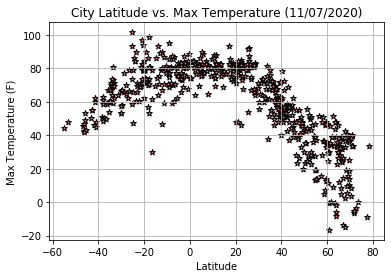

In [11]:
# Creates the scatterplot
plt.scatter(cities_data_pd["Lat"], cities_data_pd["Max Temp"], marker="*", facecolor="lightcoral", edgecolor="black")
# showcases the date of when this was run
date = time.strftime("%m/%d/%Y")
#Cleans the graph with a title, labels and a grid
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Saves the graah
plt.savefig("LatTemp.png")

#### Latitude vs. Humidity Plot

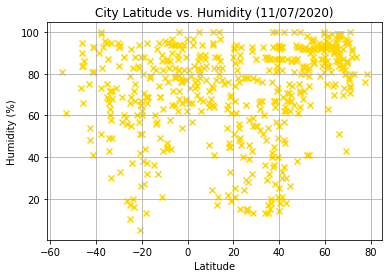

In [20]:
# Creates the scatterplot
plt.scatter(cities_data_pd["Lat"], cities_data_pd["Humidity"], marker="x", facecolor="gold")
# showcases the date of when this was run
date = time.strftime("%m/%d/%Y")
#Cleans the graph with a title, labels and a grid
plt.title(f"City Latitude vs. Humidity ({date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Saves the graph
plt.savefig("LatHumidity.png")

#### Latitude vs. Cloudiness Plot

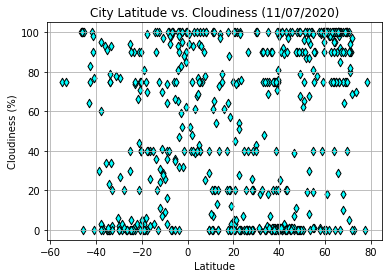

In [23]:
# Creates the scatterplot
plt.scatter(cities_data_pd["Lat"], cities_data_pd["Cloudiness"], marker="d", facecolor="aqua", edgecolor="black")
# showcases the date of when this was run
date = time.strftime("%m/%d/%Y")
#Cleans the graph with a title, labels and a grid
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Saves the graph
plt.savefig("LatCloudiness.png")

#### Latitude vs. Wind Speed Plot

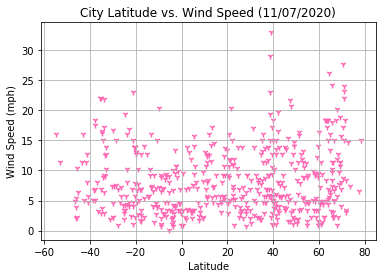

In [24]:
# Creates the scatterplot
plt.scatter(cities_data_pd["Lat"], cities_data_pd["Wind Speed"], marker="1", facecolor="hotpink", edgecolor="black")
# showcases the date of when this was run
date = time.strftime("%m/%d/%Y")
#Cleans the graph with a title, labels and a grid
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Saves the graph
plt.savefig("LatWindSpeed.png")